<img src="res/logo/coolpi.png" width="200">

# Coolpi Notebook

# 05 - ColourChecker objects

## Import packages 

In [1]:
import sys
sys.version

'3.9.0 (v3.9.0:9cf6752276, Oct  5 2020, 11:29:23) \n[Clang 6.0 (clang-600.0.57)]'

In [2]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

# SPD Illuminant

CIE D65

In [3]:
from coolpi.colour.cie_colour_spectral import Illuminant

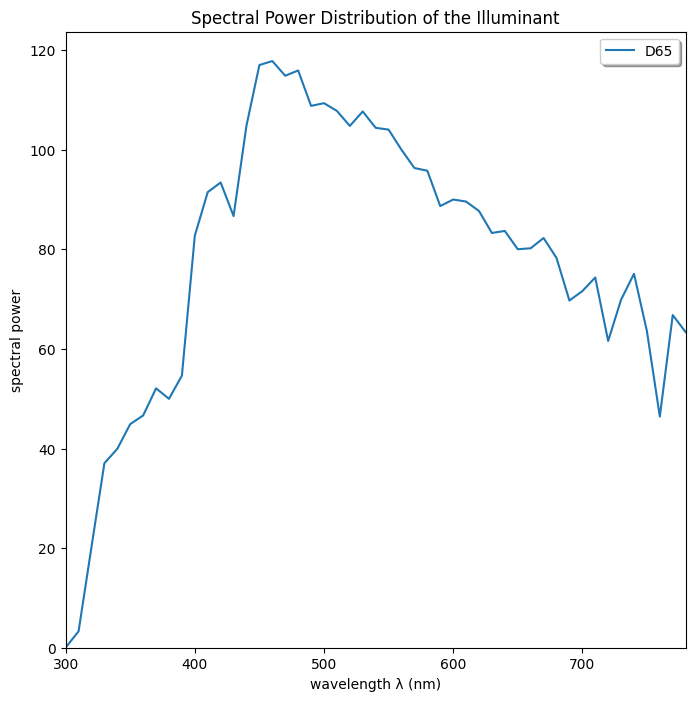

In [4]:
D65 = Illuminant("D65")
D65.plot()

From CCT

In [5]:
from coolpi.colour.cie_colour_spectral import IlluminantFromCCT

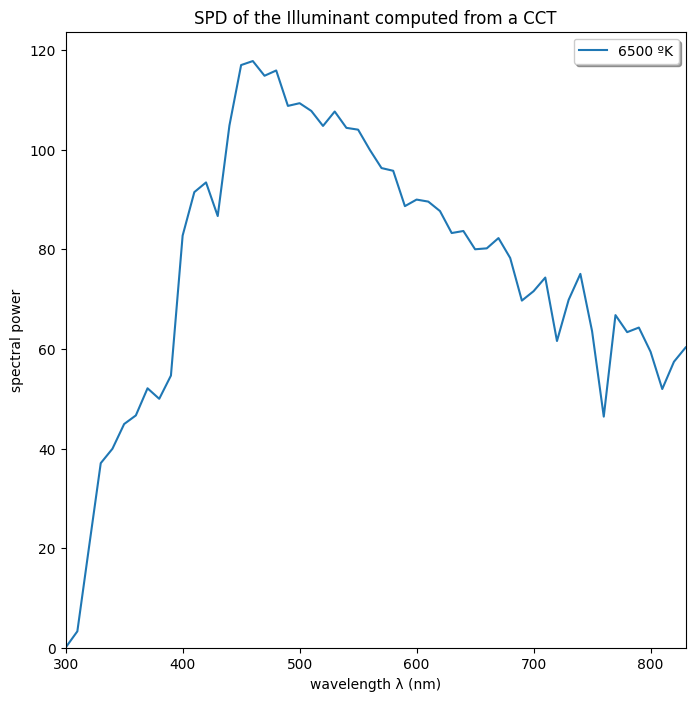

In [6]:
cct_6500 = IlluminantFromCCT(6500)
cct_6500.plot()

JNA

In [7]:
from coolpi.colour.cie_colour_spectral import MeasuredIlluminant

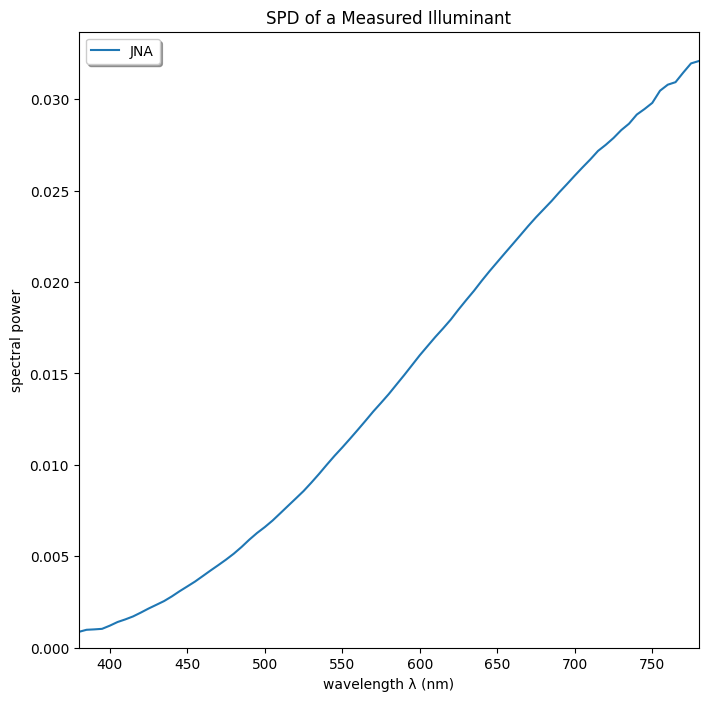

In [8]:
file_spd = ["res", "spd", "SPD_15_JNA_2022-06-19_02°_2681K.csv"]
path_spd = os.path.join(*file_spd)

JNA = MeasuredIlluminant("JNA", path_file=path_spd)
JNA.plot()

## ColorCheckerSpectral

In [9]:
from coolpi.image.colourchecker import ColourCheckerSpectral

The `ColourCheckerSpectral` class can be instantiated from: checker_name (automatic loading data from coolpy resources if the colour checker is implemented), data (measured spectral data as `dict`) or from a path_file (valid os path: JSON file with the spectral data).

Automatic loading of spectral data from coolpy resources:

In [10]:
XRCCPP = ColourCheckerSpectral("XRCCPP")

Note: The information on the measurement conditions is automatically included as metadata attribute as `dict` type.

In case of specifying a *ColourChecker* name not included in the coolpy resources:

In [11]:
CMP = ColourCheckerSpectral("CMP Refcard Color Master2")

ClassInstantiateError: ColourCheckerSpectral class could not be instantiated.

From spectral data as `dict` (only one patch as sample):

In [12]:
data_as_dict = {"Illuminant": "D65", "Observer": 2, "nm_range":[360, 740], "nm_interval":10, "patches": {"B5": [6.7000,6.7000,6.7000,6.7000,6.7000,6.8300,6.9000,7.0100,7.2275,7.6625,8.4500,9.6950,12.3225,16.6675,24.8275,35.6100,45.2950,50.2225,51.3925,50.5600,48.6275,46.0500,42.8025,38.7050,34.5425,31.5350,29.9850,29.2650,28.7025,28.3525,28.7850,30.2350,31.9150,33.3225,34.4100,34.4100,34.4100,34.4100,34.4100]}}

In [13]:
XRCCPP = ColourCheckerSpectral(checker_name="XRCCPP", data=data_as_dict)

The data `dict` should contain at least the following keys: “Illuminant”, “Observer”, “nm_range”, “nm_interval” and “patches”. Otherwise, a `DictLabelError` is raised.

In [14]:
data_as_dict_incomplete = {"Illuminant": "D65", "nm_range":[360, 740], "nm_interval":10, "patches": {"B5": [6.7000,6.7000,6.7000,6.7000,6.7000,6.8300,6.9000,7.0100,7.2275,7.6625,8.4500,9.6950,12.3225,16.6675,24.8275,35.6100,45.2950,50.2225,51.3925,50.5600,48.6275,46.0500,42.8025,38.7050,34.5425,31.5350,29.9850,29.2650,28.7025,28.3525,28.7850,30.2350,31.9150,33.3225,34.4100,34.4100,34.4100,34.4100,34.4100]}}

In [15]:
XRCCPP = ColourCheckerSpectral(checker_name="XRCCPP", data=data_as_dict_incomplete)

DictLabelError: Error in the dict or file with measurement data: Incomplete data or wrong labels.

From a generic JSON file with the measured data taken with any instrument:

In [16]:
file_rfc = ["res", "json", "XRCCPP_reflectance.json"]
path_rfc = os.path.join(*file_rfc)

In [17]:
colourchecker_metadata = {"NameColorChart": "Calibrite colorchecker CLASSIC", "Manufacturer":["Calibrite", "Made in USA", 850028833087, 2021], "Measurement Date": [[2022, 3, 11], [10, 13, 40]], "Instrument": "Konica Minolta CM-600d", "Illuminant": "D65", "Observer": 2, "Geometry": "di:8, de:8", "Specular Component":"SCI", "Measurement Area": "MAV(8mm)"}

In [18]:
XRCCPP = ColourCheckerSpectral("XRCCPP", path_json = path_rfc, metadata=colourchecker_metadata)

In [19]:
type(XRCCPP)

coolpi.image.colourchecker.ColourCheckerSpectral

Note: The JSON file should contain at least the following keys: “Illuminant”, “Observer”, “nm_range”, “nm_interval” and “patches” (with the spectral data as `dict`, i.e. “patches”={patch_id (as str): reflectance (as list)}).

Note: The *ColourCheckerSpectral* metadata can be set separately with the method `.set_instrument_measurement_as_metadata(metadata)`

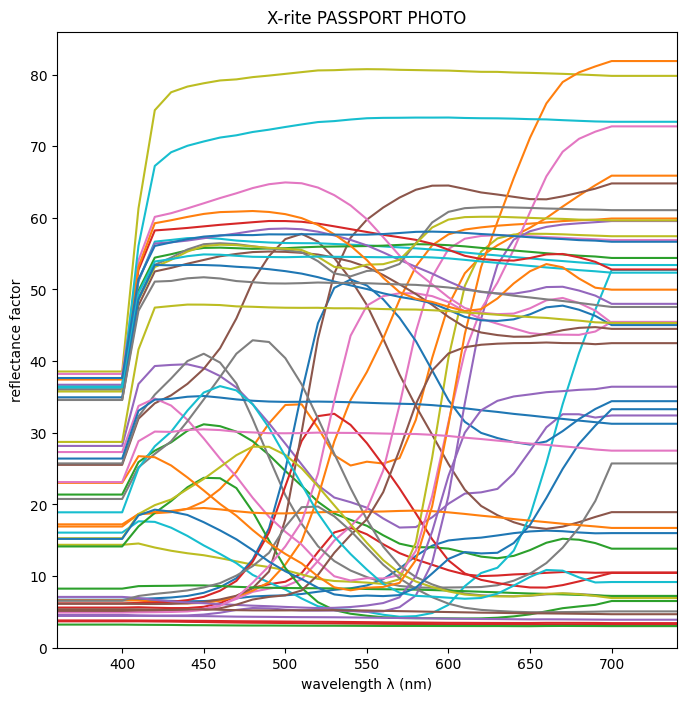

In [20]:
XRCCPP = ColourCheckerSpectral("XRCCPP")

path_figure = os.path.join(*["res", "plot", "XRCCPP_spectral_plot.png"]) # your path here
XRCCPP.plot_colourchecker(show_figure = True, save_figure = True, output_path = path_figure)

### Atributtes

In [21]:
XRCCPP = ColourCheckerSpectral("XRCCPP")

In [22]:
print(XRCCPP.type)
print(XRCCPP.subtype)
print(XRCCPP.name)
print(XRCCPP.illuminant)
print(XRCCPP.observer)
print(XRCCPP.nm_range)
print(XRCCPP.nm_interval)
#print(XRCCPP.patches) # reflectance data as dict
print(XRCCPP.patches_id)
print(XRCCPP.data.keys()) # Full data as dict
print(XRCCPP.scaled)
print(XRCCPP.metadata.keys()) # Measurement information as dict

ColourChecker object
ColourCheker Reflectance data
X-rite PASSPORT PHOTO
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
[360, 740]
10
dict_keys(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'WR'])
dict_keys(['Metadata', 'lambda_nm_interval', 'lambda_nm_range', 'patches'])
False
dict_keys(['NameColorChart', 'Manufacturer', 'Measurement Date', 'Instrument', 'Illuminant', 'Observer', 'Geometry', 'Specular Component', 'Measurement Area'])


`We recommend spectral measurements of the colour charts on a regular basis. Over time, patches may deteriorate or become dirty, and their spectral values may not necessarily match those obtained in previous measurements`.

### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [23]:
print(XRCCPP) # str method

ColourCheckerSpectral object: X-rite PASSPORT PHOTO


### Patch management

To get the total number of patches:

In [24]:
num_patches = XRCCPP.get_colourchecker_number_of_patches()
print(num_patches)

51


To get the lambda values of a patch:

In [25]:
lambda_values = XRCCPP.get_patch_lambda_values("A1")
print(lambda_values)

[6.5975, 6.5975, 6.5975, 6.5975, 6.5975, 6.6825, 6.615, 6.535, 6.48, 6.5125, 6.6425, 6.9, 7.15, 7.25, 7.3125, 7.5, 7.8175, 8.08, 8.2925, 8.69, 9.57, 11.04, 12.815, 14.2425, 14.97, 15.21, 15.3675, 15.6675, 15.9925, 16.2325, 16.3475, 16.2625, 16.085, 15.97, 15.9975, 15.9975, 15.9975, 15.9975, 15.9975]


The input `patch_id` should be a valid patch. Otherwise, a `PatchError` is raised.

In [26]:
lambda_values = XRCCPP.get_patch_lambda_values("P1")

PatchError: Patch id not present in the current ColourChecker

To get a patch as a *Reflectance* object:

In [27]:
rfc = XRCCPP.get_patch_data("A1")
type(rfc)

coolpi.colour.cie_colour_spectral.Reflectance

The input `patch_id` should be a valid patch. Otherwise, a `PatchError` is raised.

In [28]:
rfc = XRCCPP.get_patch_data("P1")

PatchError: Patch id not present in the current ColourChecker

To add a patch:

In [29]:
rfc_lambda = [100 for i in range(0,39)]
XRCCPP.add_patch(patch_id="P1", nm_range=[360, 740], nm_interval=10, lambda_values=rfc_lambda)

In [30]:
print(XRCCPP.get_colourchecker_number_of_patches())

52


The new patch shoul be in the same `nm_range` and `nm_interval` as the *ColourCheckerSpectral*. Otherwise, a `PatchError` is raised.

In [31]:
rfc_lambda = [100 for i in range(0,30)]
XRCCPP.add_patch(patch_id="P2", nm_range=[360, 740], nm_interval=10, lambda_values=rfc_lambda)

PatchError: Wrong reflectance lambda_values.

To remove a patch from the colour checker:

In [32]:
XRCCPP.remove_patch("P1")

In [33]:
print(XRCCPP.get_colourchecker_number_of_patches())

51


To set the reflectance data of the colour patches into the visible range spectrum:

In [34]:
XRCCPP.set_reflectance_into_visible_range_spectrum(visible_nm_range = [400,700], visible_nm_interval = 10)

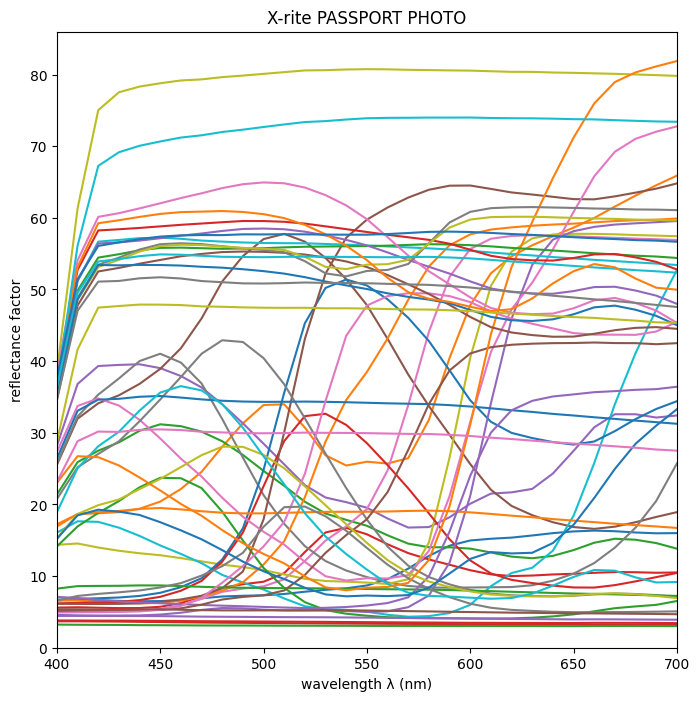

In [35]:
path_figure = os.path.join(*["res", "plot", "XRCCPP_visible_plot.png"]) # your path here
XRCCPP.plot_colourchecker(show_figure = True, save_figure = True, output_path = path_figure)

To scale the reflectance data into the range (0,1):

In [36]:
XRCCPP = ColourCheckerSpectral("XRCCPP")

In [37]:
XRCCPP.scale_reflectance_data()
print(XRCCPP.scaled)

True


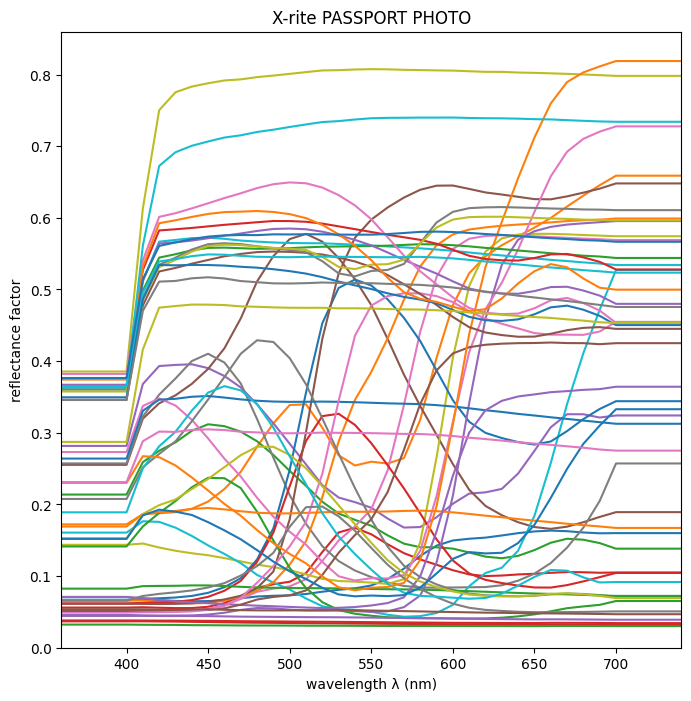

In [38]:
path_figure = os.path.join(*["res", "plot", "XRCCPP_scaled_plot.png"]) # your path here
XRCCPP.plot_colourchecker(show_figure = True, save_figure = True, output_path = path_figure)

### Colour Space Conversion - Spectral data to CIE XYZ

In [39]:
XRCCPP = ColourCheckerSpectral("XRCCPP")

To compute XYZ using the same illuminant and observer as used in the measurement of the spectral data:

In [40]:
X, Y, Z = XRCCPP.patch_spectral_to_XYZ(patch_id="A1")
print(X,Y,Z)

11.461291517251293 10.499093307882513 7.333347299183066


For a new illuminant and observer:

In [41]:
X, Y, Z = XRCCPP.patch_spectral_to_XYZ(patch_id="A1", illuminant="D50")
print(X,Y,Z)

12.090666831658837 10.740746836496644 5.57676604622951


In [42]:
X, Y, Z = XRCCPP.patch_spectral_to_XYZ(patch_id="A1", illuminant="D50", observer=10)
print(X,Y,Z)

11.908376423618433 10.534252547651414 5.4715573789714975


In [43]:
X, Y, Z = XRCCPP.patch_spectral_to_XYZ(patch_id="A1", illuminant=JNA, observer=10)
print(X,Y,Z)

15.331861272989551 11.601542087284065 2.0386263524749713


Note: Also, it is possible to compute the XYZ values referred to IlluminantFromCCT or MeasuredIlluminant objects.

`Export data`

To export the XYZ data computed form the spectral data as a *ColourCheckerXYZ*:

In [44]:
XRCCPP_XYZ = XRCCPP.to_ColourCheckerXYZ(illuminant="D65", observer=2)

In [45]:
type(XRCCPP_XYZ)

coolpi.image.colourchecker.ColourCheckerXYZ

In [46]:
XRCCPP_XYZ = XRCCPP.to_ColourCheckerXYZ(illuminant="D65", observer=10)

In [47]:
XRCCPP_XYZ = XRCCPP.to_ColourCheckerXYZ(illuminant=JNA, observer=2)

In [48]:
XRCCPP_XYZ = XRCCPP.to_ColourCheckerXYZ(illuminant=cct_6500, observer=2)

In [49]:
XRCCPP_XYZ.as_pandas_dataframe()

,patch_id,illuminant,X,Y,Z
0,A1,IlluminantFromCCT object: CCT 6500 º K,11.461082,10.499003,7.334087
1,A2,IlluminantFromCCT object: CCT 6500 º K,36.139183,33.333312,24.567786
2,A3,IlluminantFromCCT object: CCT 6500 º K,16.392457,17.310681,32.017114
3,A4,IlluminantFromCCT object: CCT 6500 º K,10.301005,12.880393,7.168591
4,A5,IlluminantFromCCT object: CCT 6500 º K,22.524783,21.288976,40.346677
5,A6,IlluminantFromCCT object: CCT 6500 º K,30.421312,41.938500,45.522947
6,B1,IlluminantFromCCT object: CCT 6500 º K,36.187440,29.164148,6.763094
7,B2,IlluminantFromCCT object: CCT 6500 º K,13.889512,12.054920,39.815447
8,B3,IlluminantFromCCT object: CCT 6500 º K,27.417913,18.465918,13.736204
9,B4,IlluminantFromCCT object: CCT 6500 º K,8.715012,6.529671,14.705755


To export the LAB data computed from the spectral data as a *ColourCheckerLAB*:

In [50]:
XRCCPP_LAB = XRCCPP.to_ColourCheckerLAB(illuminant="D65", observer=2)

In [51]:
type(XRCCPP_LAB)

coolpi.image.colourchecker.ColourCheckerLAB

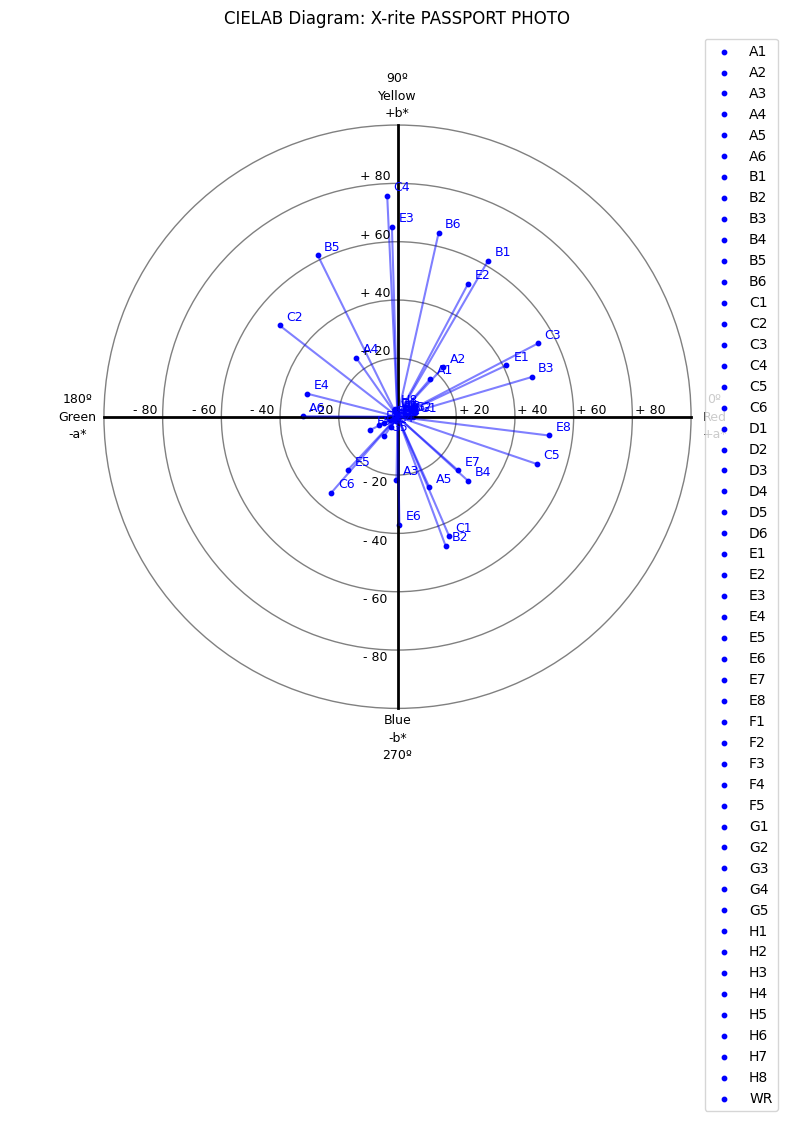

In [52]:
XRCCPP_LAB.plot_colourchecker()

In [53]:
XRCCPP_LAB = XRCCPP.to_ColourCheckerLAB(illuminant=cct_6500, observer=2)

In [54]:
XRCCPP_LAB = XRCCPP.to_ColourCheckerLAB(illuminant=JNA, observer=2)

In [55]:
XRCCPP_LAB.as_pandas_dataframe()

,patch_id,illuminant,L,a,b
0,A1,MeasuredIlluminant object: Illuminant JNA.,40.753405,13.205160,16.026047
1,A2,MeasuredIlluminant object: Illuminant JNA.,67.113829,23.055396,19.222649
2,A3,MeasuredIlluminant object: Illuminant JNA.,46.773753,-7.268505,-24.049098
3,A4,MeasuredIlluminant object: Illuminant JNA.,42.203062,-9.569840,17.519506
4,A5,MeasuredIlluminant object: Illuminant JNA.,52.530565,5.131501,-23.999282
5,A6,MeasuredIlluminant object: Illuminant JNA.,67.281029,-32.682407,-8.426183
6,B1,MeasuredIlluminant object: Illuminant JNA.,66.717553,33.484269,61.087068
7,B2,MeasuredIlluminant object: Illuminant JNA.,38.650237,-1.037334,-46.571328
8,B3,MeasuredIlluminant object: Illuminant JNA.,56.177056,47.035536,24.898248
9,B4,MeasuredIlluminant object: Illuminant JNA.,31.999097,21.313589,-17.512468


To export the spectral data as a pandas `DataFrame`:

In [56]:
XRCCPP_pd = XRCCPP.as_pandas_dataframe()
XRCCPP_pd

,patch_id,illuminant,nm_range,nm_interval,lambda_values
0,A1,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[6.5975, 6.5975, 6.5975, 6.5975, 6.5975, 6.682..."
1,A2,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[17.22, 17.22, 17.22, 17.22, 17.22, 18.64, 18...."
2,A3,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[21.3775, 21.3775, 21.3775, 21.3775, 21.3775, ..."
3,A4,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[5.605, 5.605, 5.605, 5.605, 5.605, 5.6475, 5...."
4,A5,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[28.1675, 28.1675, 28.1675, 28.1675, 28.1675, ..."
5,A6,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[25.525, 25.525, 25.525, 25.525, 25.525, 31.96..."
6,B1,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[5.035, 5.035, 5.035, 5.035, 5.035, 5.0825, 5...."
7,B2,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[25.7275, 25.7275, 25.7275, 25.7275, 25.7275, ..."
8,B3,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[14.365, 14.365, 14.365, 14.365, 14.365, 14.54..."
9,B4,Illuminant object: CIE D65 standard illuminant,"[360, 740]",10,"[16.0675, 16.0675, 16.0675, 16.0675, 16.0675, ..."


In [57]:
type(XRCCPP_pd)

pandas.core.frame.DataFrame

To export the spectral data as a JSON file:

In [58]:
path_json = os.path.join(*["res", "json", "XRCCPP_export_data.json"]) # your path here
XRCCPP.export_data_to_json_file(path_json)

### Plot

*ColourCheckerSpectral* objects can be represented as follows:

In [59]:
XRCCPP = ColourCheckerSpectral("XRCCPP")

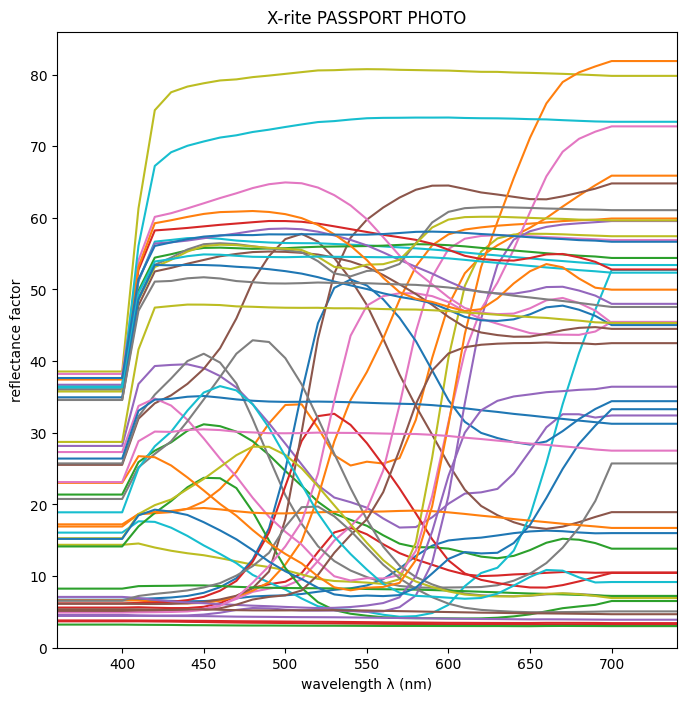

In [60]:
XRCCPP.plot_colourchecker()

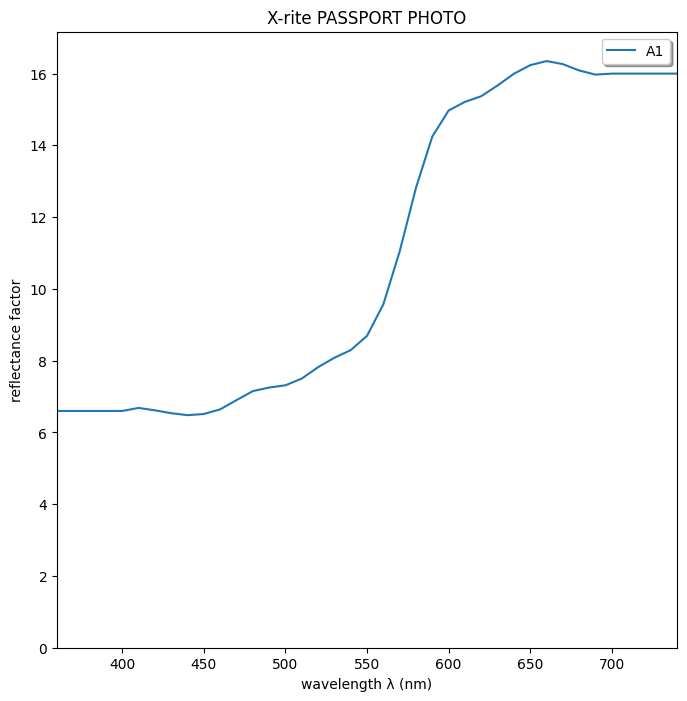

In [61]:
XRCCPP.plot_patches(["A1"])

A set of colour patches can be represented as follows:

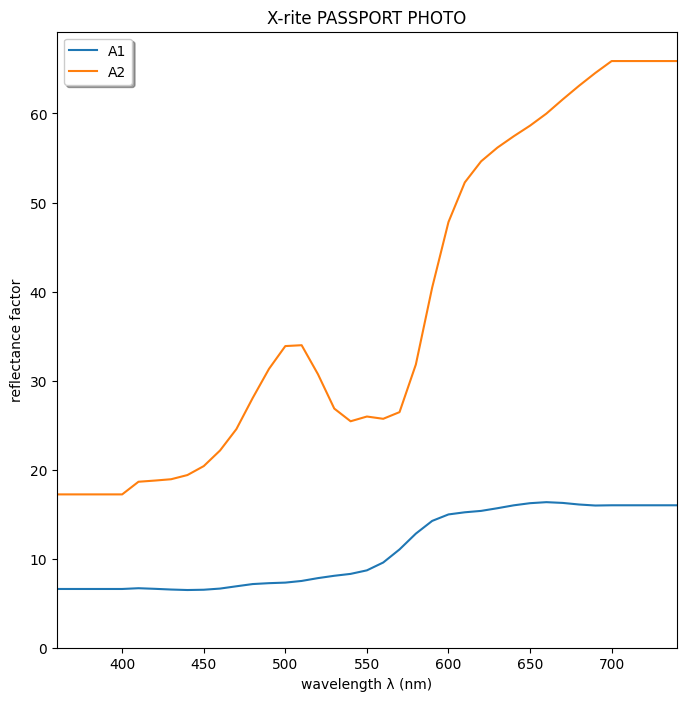

In [62]:
XRCCPP.plot_patches(["A1","A2"])

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [63]:
path_figure = os.path.join(*["res", "plot", "XRCCPP_samples_plot.png"]) # your path here
XRCCPP.plot_patches(["A1","A2"], show_figure = False, save_figure = True, output_path = path_figure)

## ColorCheckerXYZ

In [64]:
from coolpi.image.colourchecker import ColourCheckerXYZ

The `ColourCheckerXYZ`class can be instantiated from: patches_dict (XYZ data as `dict`); from path_json (valid `os` path: JSON file with the XYZ data) or load from CSV. In this case, a `params_csv` shold be passed whit the following format:

params_csv = dict(path_csv=path_file, csv_cols={"label":pos_label, "X":pos_X, "Y":pos_Y, "Z":pos_Z}, head=True)


Alert: Remember, Python starts counting from 0.

From XYZ data as `dict`:

In [65]:
data_as_dict = {
"A1": [11.3116861299, 10.2886174806, 7.01505571903],
"B2": [13.4997007812, 11.9790184311, 37.6369446057],
"C3": [19.887537955, 11.7003493539, 5.10489787605],
"D4": [18.0291683689, 19.1801885705, 21.2166071106]
}

In [66]:
colourchecker_metadata = {"NameColorChart": "GretagMacbeth", "Instrument": "Konica Minolta CM-600d", "Illuminant": "D65", "Observer": 2}

In [67]:
GM_XYZ = ColourCheckerXYZ(checker_name="GM", illuminant="D65", observer=2, data = data_as_dict, metadata=colourchecker_metadata)

From a CSV file:

In [68]:
file_csv = ["res", "csv", "GM_24_XYZ_d65_2.csv"]
path_file = os.path.join(*file_csv)

In [69]:
params_file = dict(path_csv=path_file, csv_cols={"label":0, "X":6, "Y":7, "Z":8}, head=True)
# Remember, Python starts counting from 0

In [70]:
GM_XYZ = ColourCheckerXYZ(checker_name="GM", illuminant="D65", observer=2, params_csv = params_file, metadata=colourchecker_metadata)

From a JSON file:

In [71]:
file_json = ["res", "json", "GM_24_XYZ_d65_2.json"]
path_file = os.path.join(*file_json)

In [72]:
GM_XYZ = ColourCheckerXYZ(checker_name="GM", illuminant="D65", observer=2, path_json = path_file, metadata=colourchecker_metadata)

### Attributes

In [73]:
print(GM_XYZ.type)
print(GM_XYZ.subtype)
print(GM_XYZ.name)
print(GM_XYZ.illuminant)
print(GM_XYZ.observer)
#print(GM_XYZ.patches) # XYZ data as dict
print(GM_XYZ.patches_id)
print(GM_XYZ.metadata.keys()) # Measurement information as dict

ColourChecker object
ColourChecker XYZ data
GM
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
dict_keys(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6'])
dict_keys(['NameColorChart', 'Instrument', 'Illuminant', 'Observer'])


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [74]:
print(GM_XYZ) # str method

ColourCheckerXYZ object: GM


### Patch management

To get the total number of patches:

In [75]:
num_patches = GM_XYZ.get_colourchecker_number_of_patches()
print(num_patches)

24


To get the XYZ values of a given patch:

In [76]:
X, Y, Z = GM_XYZ.get_patch_data("A1")
print(X, Y, Z)

11.3116861299 10.2886174806 7.01505571903


The input `patch_id` should be a valid patch. Otherwise, a `PatchError` is raised:

In [77]:
X, Y, Z = GM_XYZ.get_patch_data("P1")

PatchError: Patch id not present in the current ColourChecker

To add a patch:

In [78]:
GM_XYZ.add_patch(patch_id="P1", X=100, Y=100, Z=100)

In [79]:
print(GM_XYZ.get_colourchecker_number_of_patches())

25


To remove a patch from the colour checker:

In [80]:
GM_XYZ.remove_patch("P1")

In [81]:
print(GM_XYZ.get_colourchecker_number_of_patches())

24


`Export data`

To export the LAB data computed from the XYZ data as a *ColourCheckerLAB*:

In [82]:
GM_LAB = GM_XYZ.to_ColourCheckerLAB(illuminant="D65")

In [83]:
type(GM_LAB)

coolpi.image.colourchecker.ColourCheckerLAB

In [84]:
GM_LAB = GM_XYZ.to_ColourCheckerLAB(illuminant=cct_6500)

In [85]:
GM_LAB = GM_XYZ.to_ColourCheckerLAB(illuminant=JNA)

In [86]:
GM_LAB_pd = GM_LAB.as_pandas_dataframe()
GM_LAB_pd

,patch_id,illuminant,L,a,b
0,A1,MeasuredIlluminant object: Illuminant JNA.,38.355521,-1.521042,-28.789642
1,A2,MeasuredIlluminant object: Illuminant JNA.,65.359121,-4.482944,-47.364104
2,A3,MeasuredIlluminant object: Illuminant JNA.,50.549417,-16.913113,-92.780201
3,A4,MeasuredIlluminant object: Illuminant JNA.,43.372357,-27.933414,-20.691575
4,A5,MeasuredIlluminant object: Illuminant JNA.,55.905659,-6.035057,-102.925398
5,A6,MeasuredIlluminant object: Illuminant JNA.,71.399768,-50.506803,-77.710847
6,B1,MeasuredIlluminant object: Illuminant JNA.,60.964109,11.926486,12.916921
7,B2,MeasuredIlluminant object: Illuminant JNA.,41.182754,0.425366,-115.871847
8,B3,MeasuredIlluminant object: Illuminant JNA.,50.650702,27.768212,-38.444510
9,B4,MeasuredIlluminant object: Illuminant JNA.,31.515596,10.171885,-75.507980


To export the XYZ data as a pandas `DataFrame`:

In [87]:
GM_XYZ_pd = GM_XYZ.as_pandas_dataframe()
GM_XYZ_pd

,patch_id,illuminant,X,Y,Z
0,A1,Illuminant object: CIE D65 standard illuminant,11.311686,10.288617,7.015056
1,A2,Illuminant object: CIE D65 standard illuminant,37.216757,34.502040,25.207161
2,A3,Illuminant object: CIE D65 standard illuminant,17.641584,18.882470,34.099022
3,A4,Illuminant object: CIE D65 standard illuminant,10.627902,13.408460,7.110250
4,A5,Illuminant object: CIE D65 standard illuminant,25.173979,23.818546,44.572375
5,A6,Illuminant object: CIE D65 standard illuminant,31.136046,42.771736,45.461872
6,B1,Illuminant object: CIE D65 standard illuminant,36.405324,29.207257,6.557063
7,B2,Illuminant object: CIE D65 standard illuminant,13.499701,11.979018,37.636945
8,B3,Illuminant object: CIE D65 standard illuminant,28.048424,18.968816,13.762287
9,B4,Illuminant object: CIE D65 standard illuminant,8.911350,6.872814,14.887874


In [88]:
type(GM_XYZ_pd)

pandas.core.frame.DataFrame

To export the XYZ data as a JSON file:

In [89]:
path_json = os.path.join(*["res", "json", "GM_export_data_XYZ.json"]) # your path here
GM_XYZ.export_data_to_json_file(path_json)

## ColorCheckerLAB

In [90]:
from coolpi.image.colourchecker import ColourCheckerLAB

The `ColourCheckerLAB`class can be instantiated from: patches_dict (LAB data as `dict`); from path_json (valid `os` path: JSON file with the LAB data) or load from CSV. In this case, a `params_csv`shold be passed whit the following format:

params_csv = dict(path_csv=path_file, csv_cols={"label":pos_label, "L":pos_L, "A":pos_a, "B":pos_b}, head=True)


Alert: Remember, Python starts counting from 0.

From LAB data as `dict`:

In [91]:
data_as_dict = {
"A1": [39.3252, 11.7671, 13.4596],
"B2": [41.6404, 17.3296, -45.8501],
"C3": [42.5921, 48.7030, 25.8693],
"D4": [52.0973, -0.1819, -0.6007]
}

In [92]:
colourchecker_metadata = {"NameColorChart": "Calibrite colorchecker CLASSIC", "Manufacturer":["Calibrite", "Made in USA", 850028833087, 2021], "Measurement Date": [[2022, 3, 11], [10, 13, 40]], "Instrument": "Konica Minolta CM-600d", "Illuminant": "D65", "Observer": 2, "Geometry": "di:8, de:8", "Specular Component":"SCI", "Measurement Area": "MAV(8mm)"}

In [93]:
CCC_LAB = ColourCheckerLAB(checker_name="CCC", illuminant="D65", observer=2, data = data_as_dict, metadata=colourchecker_metadata)

From a CSV file:

In [94]:
file_csv = ["res", "csv", "Calibrite_Classic_24_2022-03-11_10-13-40_LAB.csv"]
path_file = os.path.join(*file_csv)

In [95]:
params_file = dict(path_csv=path_file, csv_cols={"label":0, "L":1, "A":2, "B":3}, head=True)
# Remember, Python starts counting from 0

In [96]:
CCC_LAB = ColourCheckerLAB(checker_name="CCC", illuminant="D65", observer=2, params_csv = params_file, metadata=colourchecker_metadata)

From a JSON file:

In [97]:
file_json = ["res", "json", "CCC_24_LAB_d65_2.json"]
path_file = os.path.join(*file_json)

In [98]:
CCC_LAB = ColourCheckerLAB(checker_name="CCC", illuminant="D65", observer=2, path_json = path_file, metadata=colourchecker_metadata)

### Attributes

In [99]:
print(CCC_LAB.type)
print(CCC_LAB.subtype)
print(CCC_LAB.name)
print(CCC_LAB.illuminant)
print(CCC_LAB.observer)
#print(CCC_LAB.patches) # XYZ data as dict
print(CCC_LAB.patches_id)
print(CCC_LAB.metadata.keys()) # Measurement information as dict

ColourChecker object
ColourChecker LAB data
CCC
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
dict_keys(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B2', 'B1', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6'])
dict_keys(['NameColorChart', 'Manufacturer', 'Measurement Date', 'Instrument', 'Illuminant', 'Observer', 'Geometry', 'Specular Component', 'Measurement Area'])


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [100]:
print(CCC_LAB) # str method

ColourCheckerLAB object: CCC


### Patch management

To get the total number of patches:

In [101]:
num_patches = CCC_LAB.get_colourchecker_number_of_patches()
print(num_patches)

24


To get the LAB values of a given patch:

In [102]:
L, a, b = CCC_LAB.get_patch_data("A1")
print(L, a, b)

39.3252 11.7671 13.4596


The input `patch_id` should be a valid patch. Otherwise, a `PatchError` is raised:

In [103]:
L, a, b = CCC_LAB.get_patch_data("P1")

PatchError: Patch id not present in the current ColourChecker

To add a patch:

In [104]:
CCC_LAB.add_patch(patch_id="P1", L=0, a=0, b=0)

In [105]:
print(CCC_LAB.get_colourchecker_number_of_patches())

25


To remove a patch from the colour checker:

In [106]:
CCC_LAB.remove_patch("P1")

In [107]:
print(CCC_LAB.get_colourchecker_number_of_patches())

24


`Export data`

To export the XYZ data computed from the LAB data as a *ColourCheckerXYZ*:

In [108]:
CCC_XYZ = CCC_LAB.to_ColourCheckerXYZ(illuminant="D65")

In [109]:
type(CCC_XYZ)

coolpi.image.colourchecker.ColourCheckerXYZ

In [110]:
CCC_XYZ = CCC_LAB.to_ColourCheckerXYZ(illuminant=cct_6500)

In [111]:
CCC_XYZ = CCC_LAB.to_ColourCheckerXYZ(illuminant=D65)

In [112]:
CCC_XYZ = CCC_LAB.to_ColourCheckerXYZ(illuminant=JNA)

In [113]:
CCC_XYZ_pd = CCC_XYZ.as_pandas_dataframe()
CCC_XYZ_pd

,patch_id,illuminant,X,Y,Z
0,A1,MeasuredIlluminant object: Illuminant JNA.,14.054164,10.849132,2.098294
1,A2,MeasuredIlluminant object: Illuminant JNA.,44.682229,35.212145,7.332276
2,A3,MeasuredIlluminant object: Illuminant JNA.,21.857660,19.598155,10.212961
3,A4,MeasuredIlluminant object: Illuminant JNA.,13.246551,14.079690,2.105753
4,A5,MeasuredIlluminant object: Illuminant JNA.,30.824955,24.480698,13.177553
5,A6,MeasuredIlluminant object: Illuminant JNA.,38.137253,44.271507,13.317134
6,B2,MeasuredIlluminant object: Illuminant JNA.,16.838805,12.268939,11.687681
7,B1,MeasuredIlluminant object: Illuminant JNA.,45.722524,31.053891,1.955904
8,B3,MeasuredIlluminant object: Illuminant JNA.,33.903674,19.373889,4.005205
9,B4,MeasuredIlluminant object: Illuminant JNA.,10.762503,6.731338,4.350692


To export the LAB data as a pandas `DataFrame`:

In [114]:
CCC_LAB_pd = CCC_LAB.as_pandas_dataframe()
CCC_LAB_pd

,patch_id,illuminant,L,a,b
0,A1,Illuminant object: CIE D65 standard illuminant,39.3252,11.7671,13.4596
1,A2,Illuminant object: CIE D65 standard illuminant,65.9135,14.8808,16.9047
2,A3,Illuminant object: CIE D65 standard illuminant,51.3798,-0.5051,-22.6732
3,A4,Illuminant object: CIE D65 standard illuminant,44.3470,-14.7667,22.0209
4,A5,Illuminant object: CIE D65 standard illuminant,56.5659,12.3422,-26.0424
5,A6,Illuminant object: CIE D65 standard illuminant,72.4096,-32.0419,0.7425
6,B2,Illuminant object: CIE D65 standard illuminant,41.6404,17.3296,-45.8501
7,B1,Illuminant object: CIE D65 standard illuminant,62.5531,32.1990,55.4045
8,B3,Illuminant object: CIE D65 standard illuminant,51.1218,46.2908,14.0972
9,B4,Illuminant object: CIE D65 standard illuminant,31.1873,25.5468,-23.1146


In [115]:
type(CCC_LAB_pd)

pandas.core.frame.DataFrame

To export the LAB data as a JSON file:

In [116]:
path_json = os.path.join(*["res", "json", "CCC_export_data_LAB.json"]) # your path here
CCC_LAB.export_data_to_json_file(path_json)

### Plot

*ColourcheckerLAB objects* can be represented as follows:

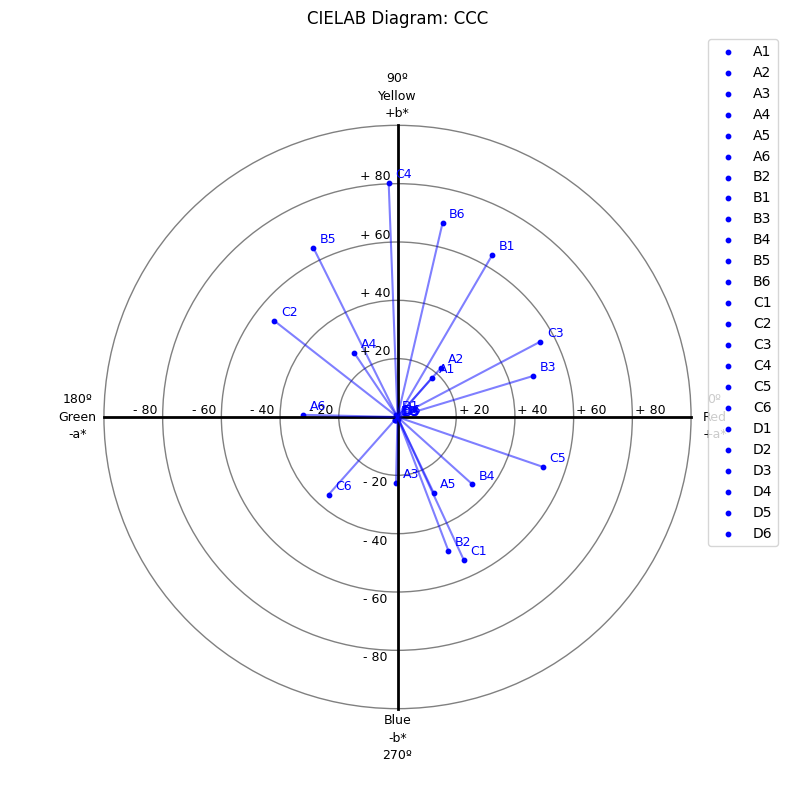

In [117]:
CCC_LAB.plot_colourchecker()

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid output_path.


In [118]:
path_figure = os.path.join(*["res", "plot"], "CCC_LAB_plot.png")
CCC_LAB.plot_colourchecker(show_figure = False, save_figure = True, output_path = path_figure)

A set of colour patches can be represented as follows:

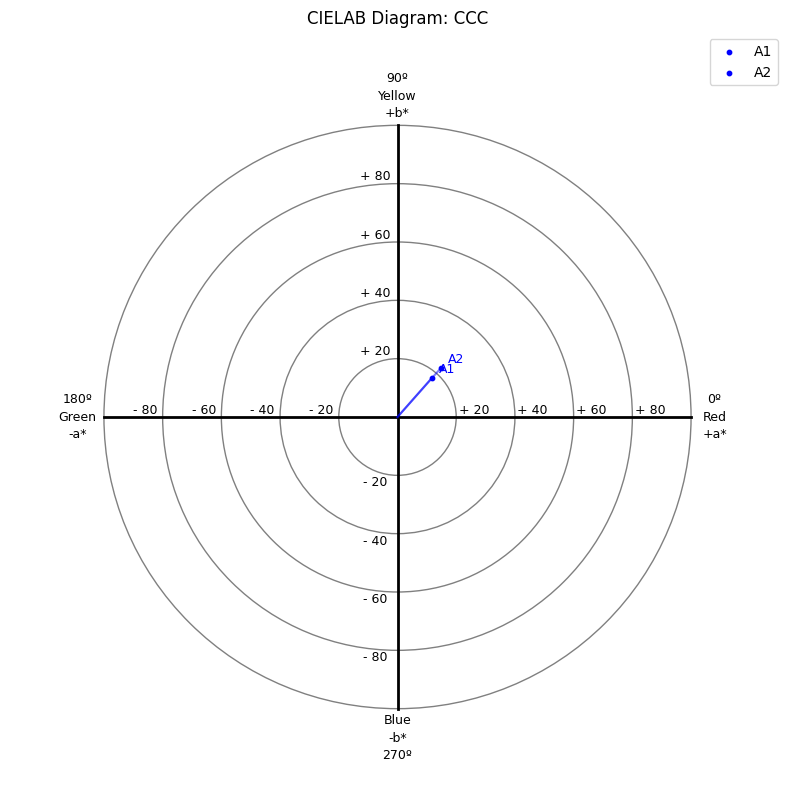

In [119]:
CCC_LAB.plot_patches(["A1","A2"])

In addition, it is posible to save the figure setting `True` the opcion `save_figure` and introducing a valid `output_path`:

In [120]:
path_figure = os.path.join(*["res", "plot", "CCC_LAB_samples_plot.png"]) # your path here
CCC_LAB.plot_patches(["A1","A2"], show_figure = False, save_figure = True, output_path = path_figure)

## ColorCheckerRGB

In [121]:
from coolpi.image.colourchecker import ColourCheckerRGB

From dict

In [122]:
data_as_dict = {
 'A1': (482.780625, 389.610625, 117.115625),
 'A2': (1614.445, 1226.3875, 415.245),
 'A3': (535.3375, 809.37, 439.4275),
 'A4': (424.7675, 594.4634375, 161.335),
 'A5': (937.2725, 1077.8575, 586.9075),
 'A6': (976.41875, 2012.144375, 825.36375),
 'B1': (1701.5975, 995.8575, 164.24),
 'B2': (333.04875, 526.209375, 418.59),
 'B3': (1487.425, 622.858125, 198.82875),
 'B4': (397.1575, 298.0428125, 178.135),
 'B5': (1371.31, 1962.948125, 389.39875),
 'B6': (2316.55625, 1778.48375, 274.41),
 'C1': (157.275, 272.4553125, 272.934375),
 'C2': (424.585, 939.61, 251.305),
 'C3': (1199.7975, 398.519375, 110.97375),
 'C4': (2439.41, 2327.4025, 347.6475),
 'C5': (1561.56625, 749.494375, 380.11875),
 'C6': (323.215, 946.37125, 608.13375),
 'D1': (2691.9025, 3185.595, 1204.645),
 'D2': (1891.29875, 2260.2575, 867.435),
 'D3': (1243.5, 1498.68875, 577.32),
 'D4': (690.24375, 826.01, 315.67875),
 'D5': (344.115, 418.266875, 165.17125),
 'D6': (142.025, 169.595, 69.49)}

In [123]:
colourchecker_metadata = {"NameColorChart": "X-Rite Colorchecker PASSPORT PHOTO", "Manufacturer":["X-RITE", "Made in USA", 710762440005, "09/2014"], "Measurement Date": [[2022, 3, 11], [11, 12, 26]], "Instrument": "Nikon D5600", "Illuminant": JNA, "Observer": 2}

In [124]:
XRCCPP_RGB = ColourCheckerRGB(checker_name="XRCCPP", illuminant=JNA, observer=2, data = data_as_dict, metadata=colourchecker_metadata)

From a CSV file:

In [125]:
file_csv = ["res", "csv", "XRCCPP_RAW_RGB.csv"]
path_file = os.path.join(*file_csv)

In [126]:
params_file = dict(path_csv=path_file, csv_cols={"label":0, "R":1, "G":2, "B":3}, head=True)
# Remember, Python starts counting from 0

In [127]:
XRCCPP_RGB = ColourCheckerRGB(checker_name="XRCCPP", illuminant="D65", observer=2, params_csv = params_file, metadata=colourchecker_metadata)

From a JSON file:

In [128]:
file_json = ["res", "json", "XRCCPP_RAW_RGB.json"]
path_file = os.path.join(*file_json)

In [129]:
XRCCPP_RGB = ColourCheckerRGB(checker_name="XRCCPP", illuminant="D65", observer=2, path_json = path_file, metadata=colourchecker_metadata)

## Attributes

In [130]:
print(XRCCPP_RGB.type)
print(XRCCPP_RGB.subtype)
print(XRCCPP_RGB.name)
print(XRCCPP_RGB.illuminant)
print(XRCCPP_RGB.observer)
#print(XRCCPP_RGB.patches) # XYZ data as dict
print(XRCCPP_RGB.patches_id)
print(XRCCPP_RGB.metadata.keys()) # Measurement information as dict

ColourChecker object
ColourChecker RGB data
XRCCPP
Illuminant object: CIE D65 standard illuminant
2º standard observer (CIE 1931)
dict_keys(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6'])
dict_keys(['NameColorChart', 'Manufacturer', 'Measurement Date', 'Instrument', 'Illuminant', 'Observer'])


### Methods

The `__str__` method returns the string representation of the object. This method is called when the print() or str() 
function is invoked on an object.

In [131]:
print(XRCCPP_RGB) # str method

ColourCheckerRGB object: XRCCPP


### Patch management

To get the total number of patches:

In [132]:
num_patches = XRCCPP_RGB.get_colourchecker_number_of_patches()
print(num_patches)

24


To get the RGB values of a given patch:

In [133]:
R, G, B = XRCCPP_RGB.get_patch_data("A1")
print(R, G, B)

482.780625 389.610625 117.115625


The input `patch_id` should be a valid patch. Otherwise, a `PatchError` is raised

In [134]:
R, G, B = XRCCPP_RGB.get_patch_data("P1")

PatchError: Patch id not present in the current ColourChecker

To add a patch:

In [135]:
XRCCPP_RGB.add_patch(patch_id="P1", R=0, G=0, B=0)

In [136]:
print(XRCCPP_RGB.get_colourchecker_number_of_patches())

25


To remove a patch from the colour checker:

In [137]:
XRCCPP_RGB.remove_patch("P1")

In [138]:
print(XRCCPP_RGB.get_colourchecker_number_of_patches())

24


`Export data`

To export the RGB data as a pandas `DataFrame`:

In [139]:
XRCCPP_RGB_pd = XRCCPP_RGB.as_pandas_dataframe()
XRCCPP_RGB_pd

,patch_id,illuminant,R,G,B
0,A1,Illuminant object: CIE D65 standard illuminant,482.780625,389.610625,117.115625
1,A2,Illuminant object: CIE D65 standard illuminant,1614.445000,1226.387500,415.245000
2,A3,Illuminant object: CIE D65 standard illuminant,535.337500,809.370000,439.427500
3,A4,Illuminant object: CIE D65 standard illuminant,424.767500,594.463438,161.335000
4,A5,Illuminant object: CIE D65 standard illuminant,937.272500,1077.857500,586.907500
5,A6,Illuminant object: CIE D65 standard illuminant,976.418750,2012.144375,825.363750
6,B1,Illuminant object: CIE D65 standard illuminant,1701.597500,995.857500,164.240000
7,B2,Illuminant object: CIE D65 standard illuminant,333.048750,526.209375,418.590000
8,B3,Illuminant object: CIE D65 standard illuminant,1487.425000,622.858125,198.828750
9,B4,Illuminant object: CIE D65 standard illuminant,397.157500,298.042813,178.135000


In [140]:
type(XRCCPP_RGB_pd)

pandas.core.frame.DataFrame

To export the RGB data as a JSON file:

In [141]:
path_json = os.path.join(*["res", "json", "XRCCPP_export_data_RGB.json"]) # your path here
XRCCPP_RGB.export_data_to_json_file(path_json)